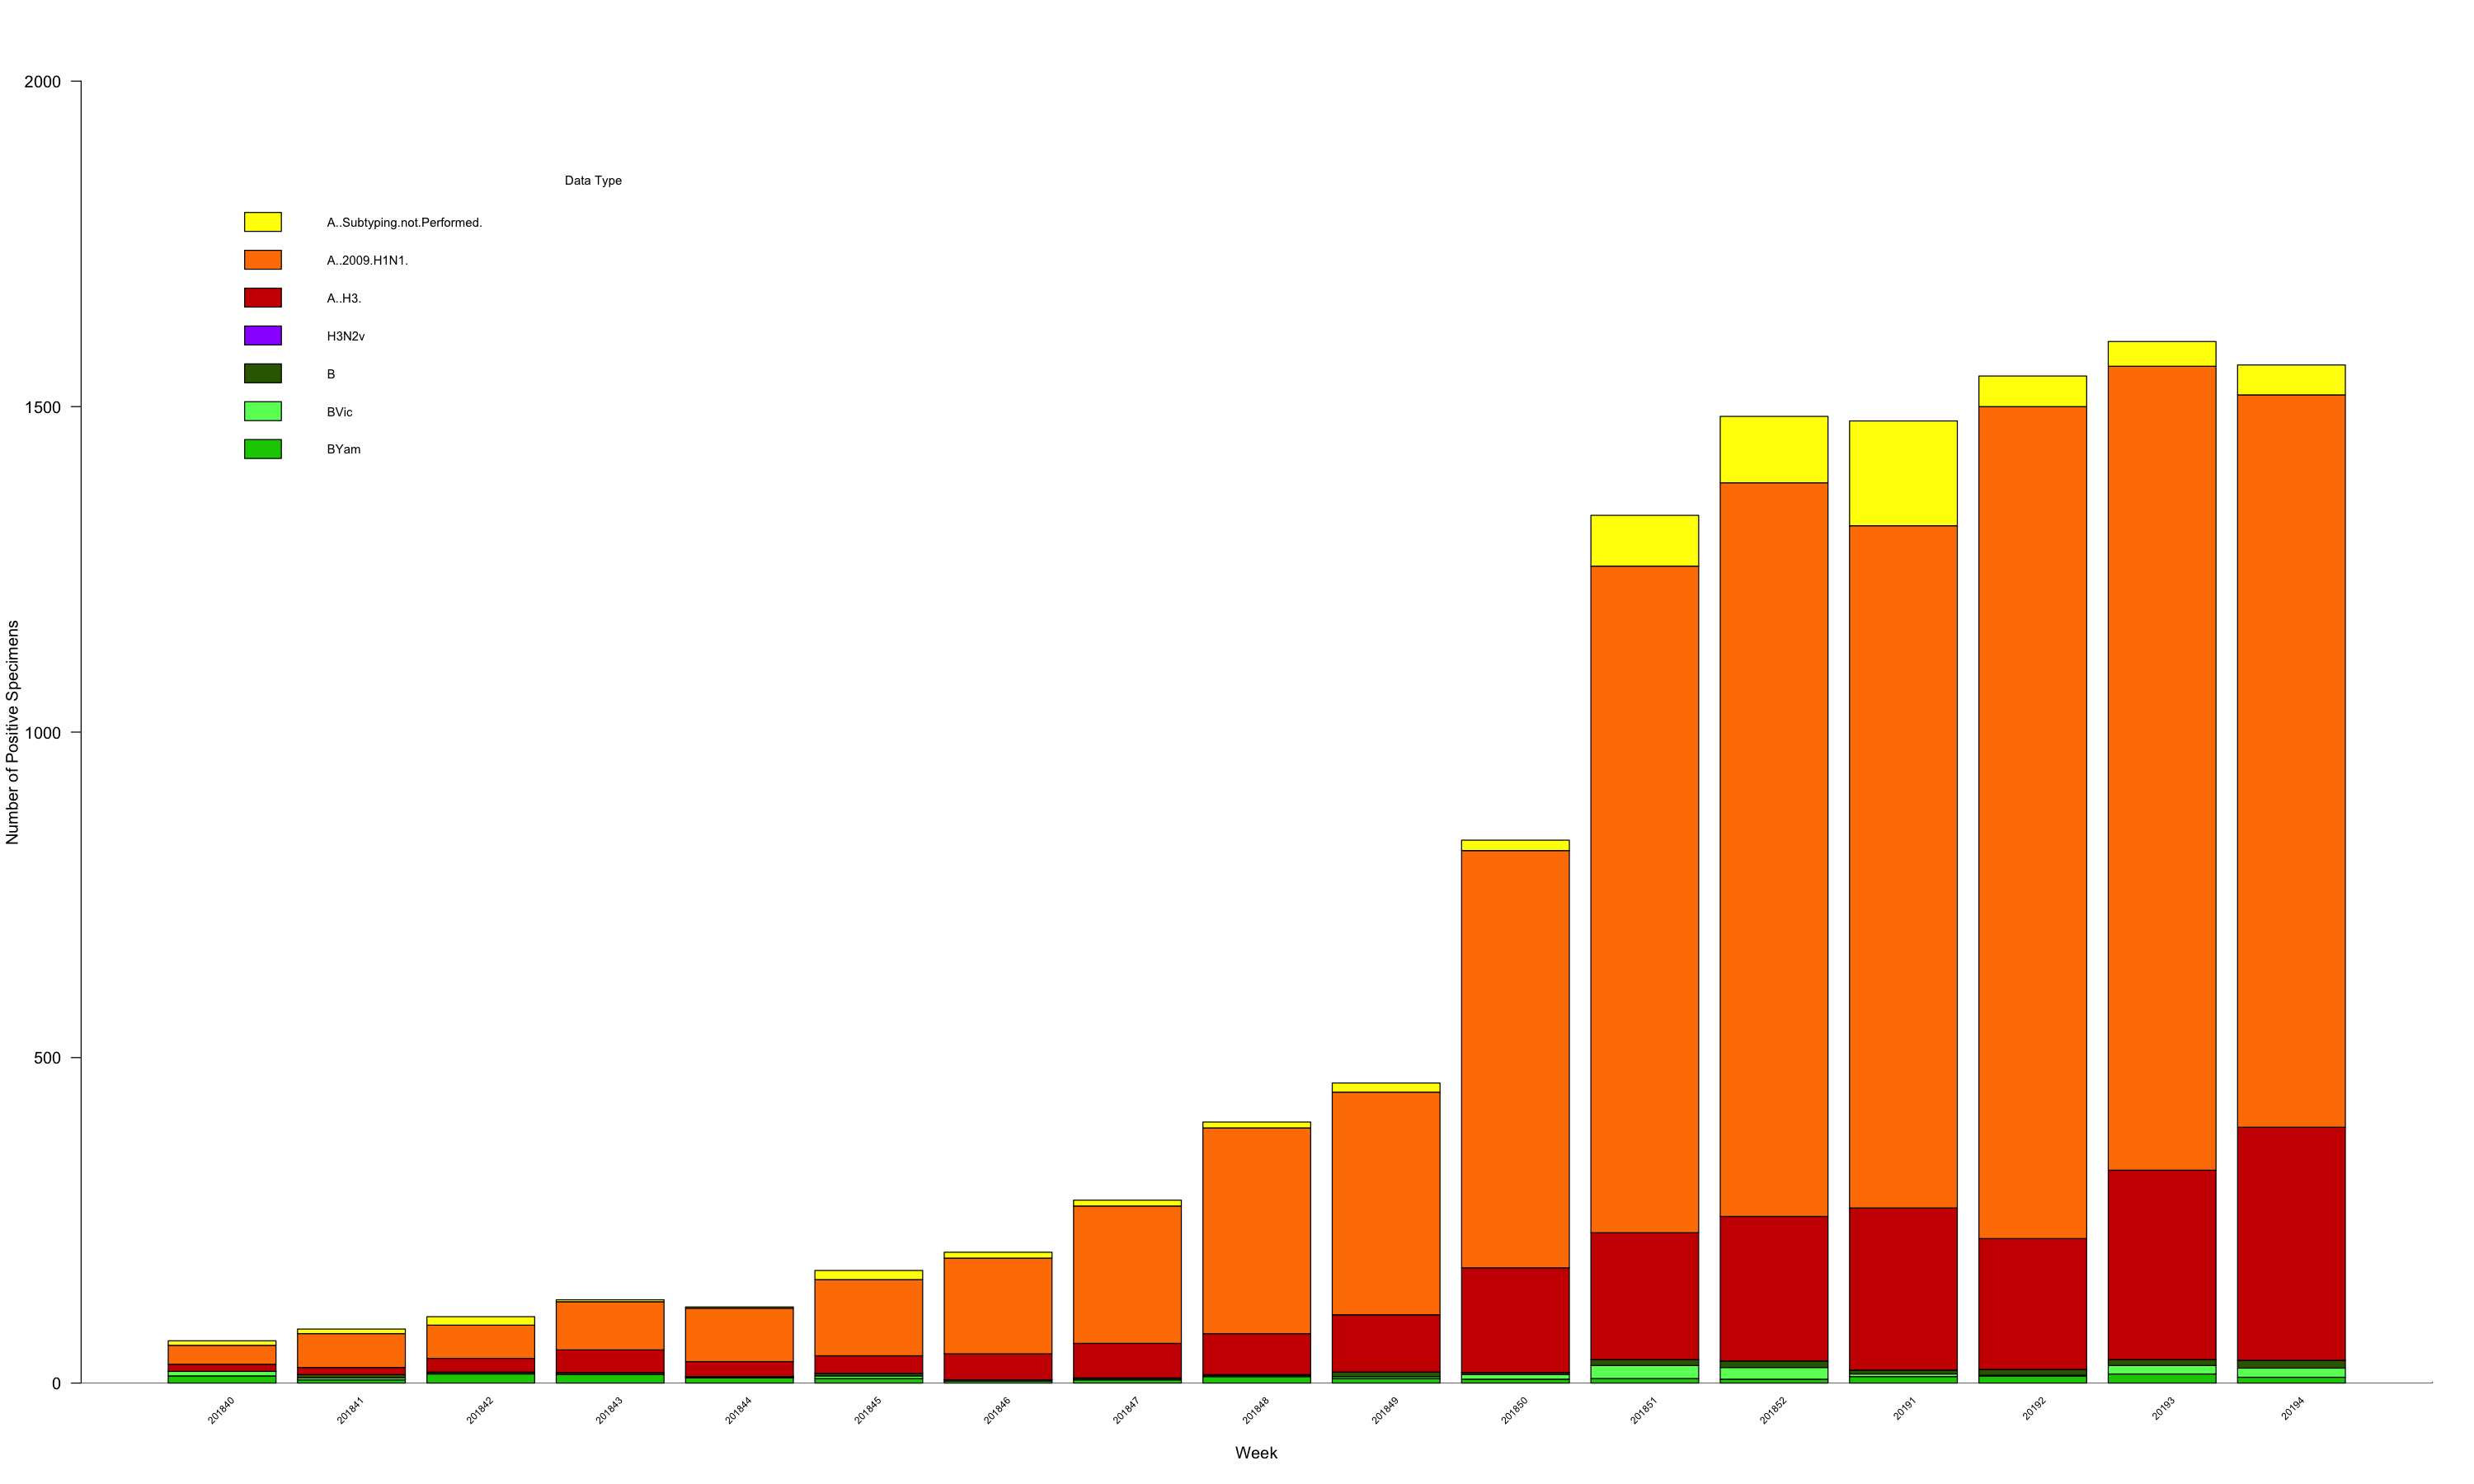

In [128]:
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs.csv", skip = 1)
ptestsR <- ptests[1:17, c(1,2,3,4,5,11,10,9,12,7,6,8)]
year <- ptestsR[,3]
weeks <- ptestsR[,4]
weekLabel <- paste0(year, weeks)
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))),beside=F,xlab="Week", ylab="Number of Positive Specimens", las=2, xaxt="n",ylim=c(0,2000),col=colors,axis.lty="solid")
legend("topleft",inset=c(0.05,0.05),rownames(t(ptestsR[12:6])),fill=rev(colors),title="Data Type", cex = 0.75, box.lty=0)
axis(1, at=weekLabel, labels = weekLabel, pos=1)
text(plt, par("usr")[3], srt = 45, labels= weekLabel,adj = c(1.1,3.1), xpd = TRUE, cex=0.6)
abline(h=0)

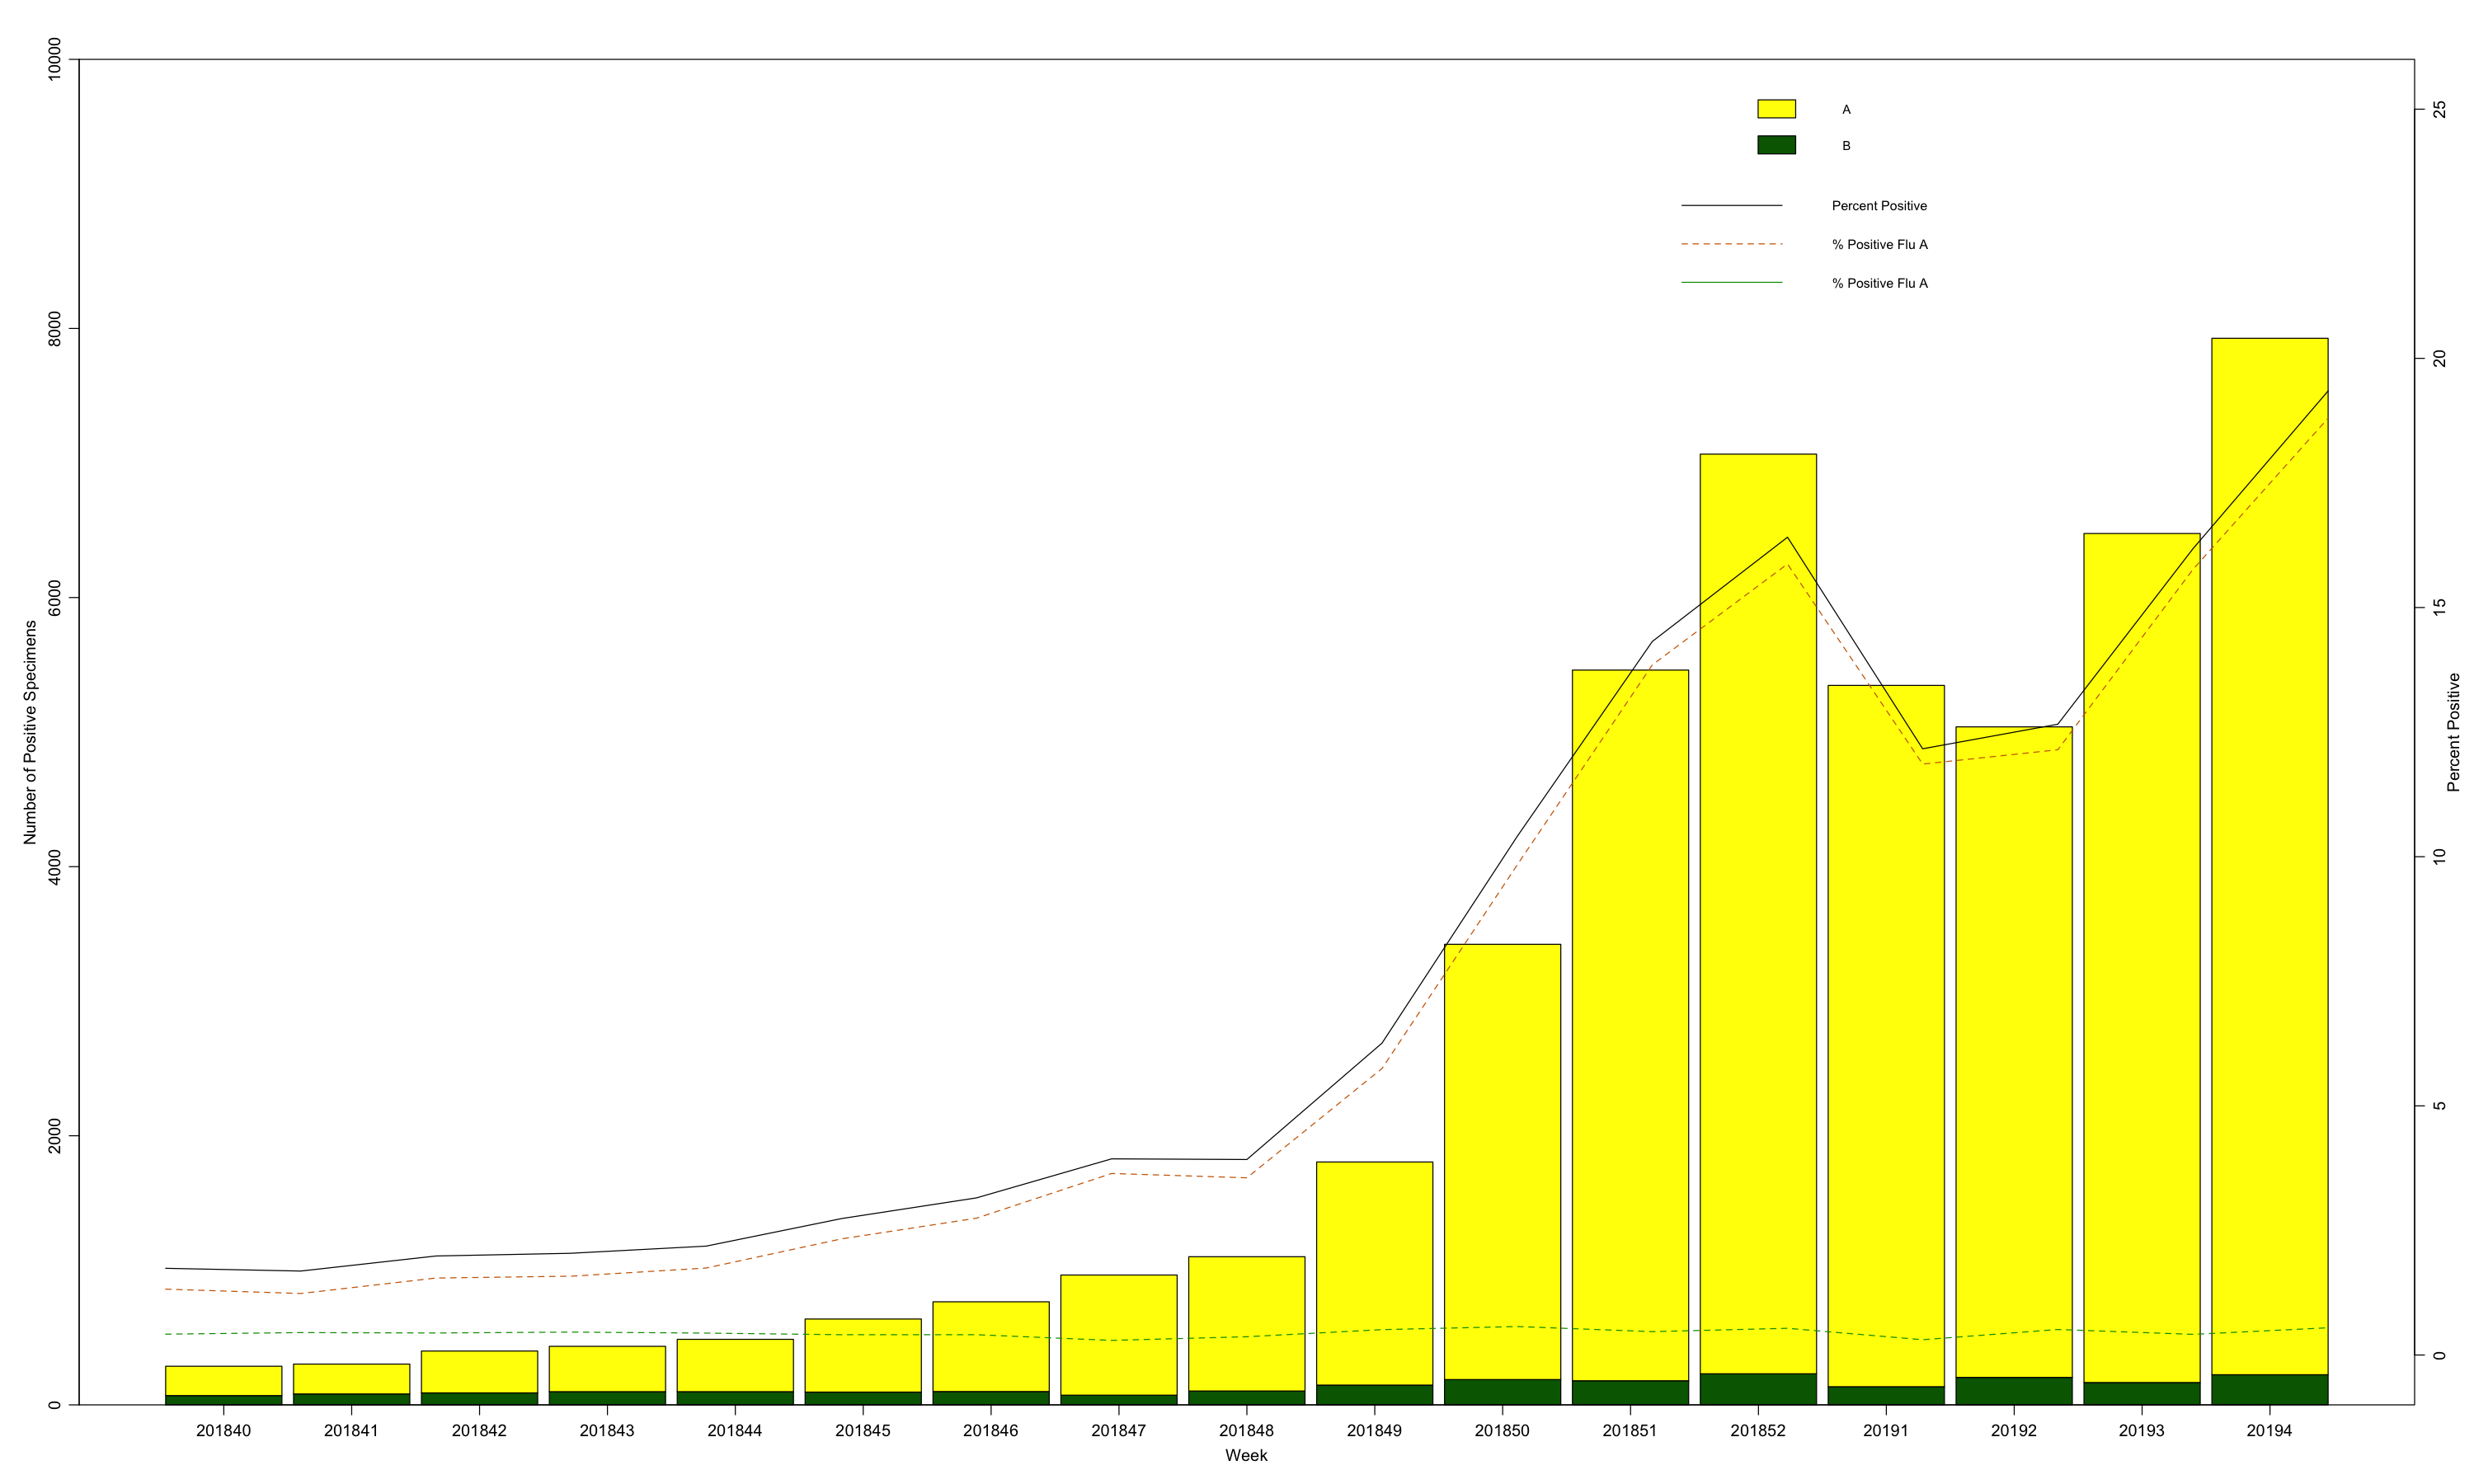

In [129]:

natSumm<-read.csv("WHO_NREVSS_Clinical_Labs.csv", skip = 1)
natSumm <- natSumm[1:17,]
colors <- c("darkgreen", "yellow")
year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu A")

par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), beside=F, xlab="Week", ylab="Number of Positive Specimens", ylim=c(0,10000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,25), lwd=1, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2)
axis(4)
mtext("Percent Positive", side = 4, line = 1.45)
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=1:2, cex=0.8, box.lty=0)



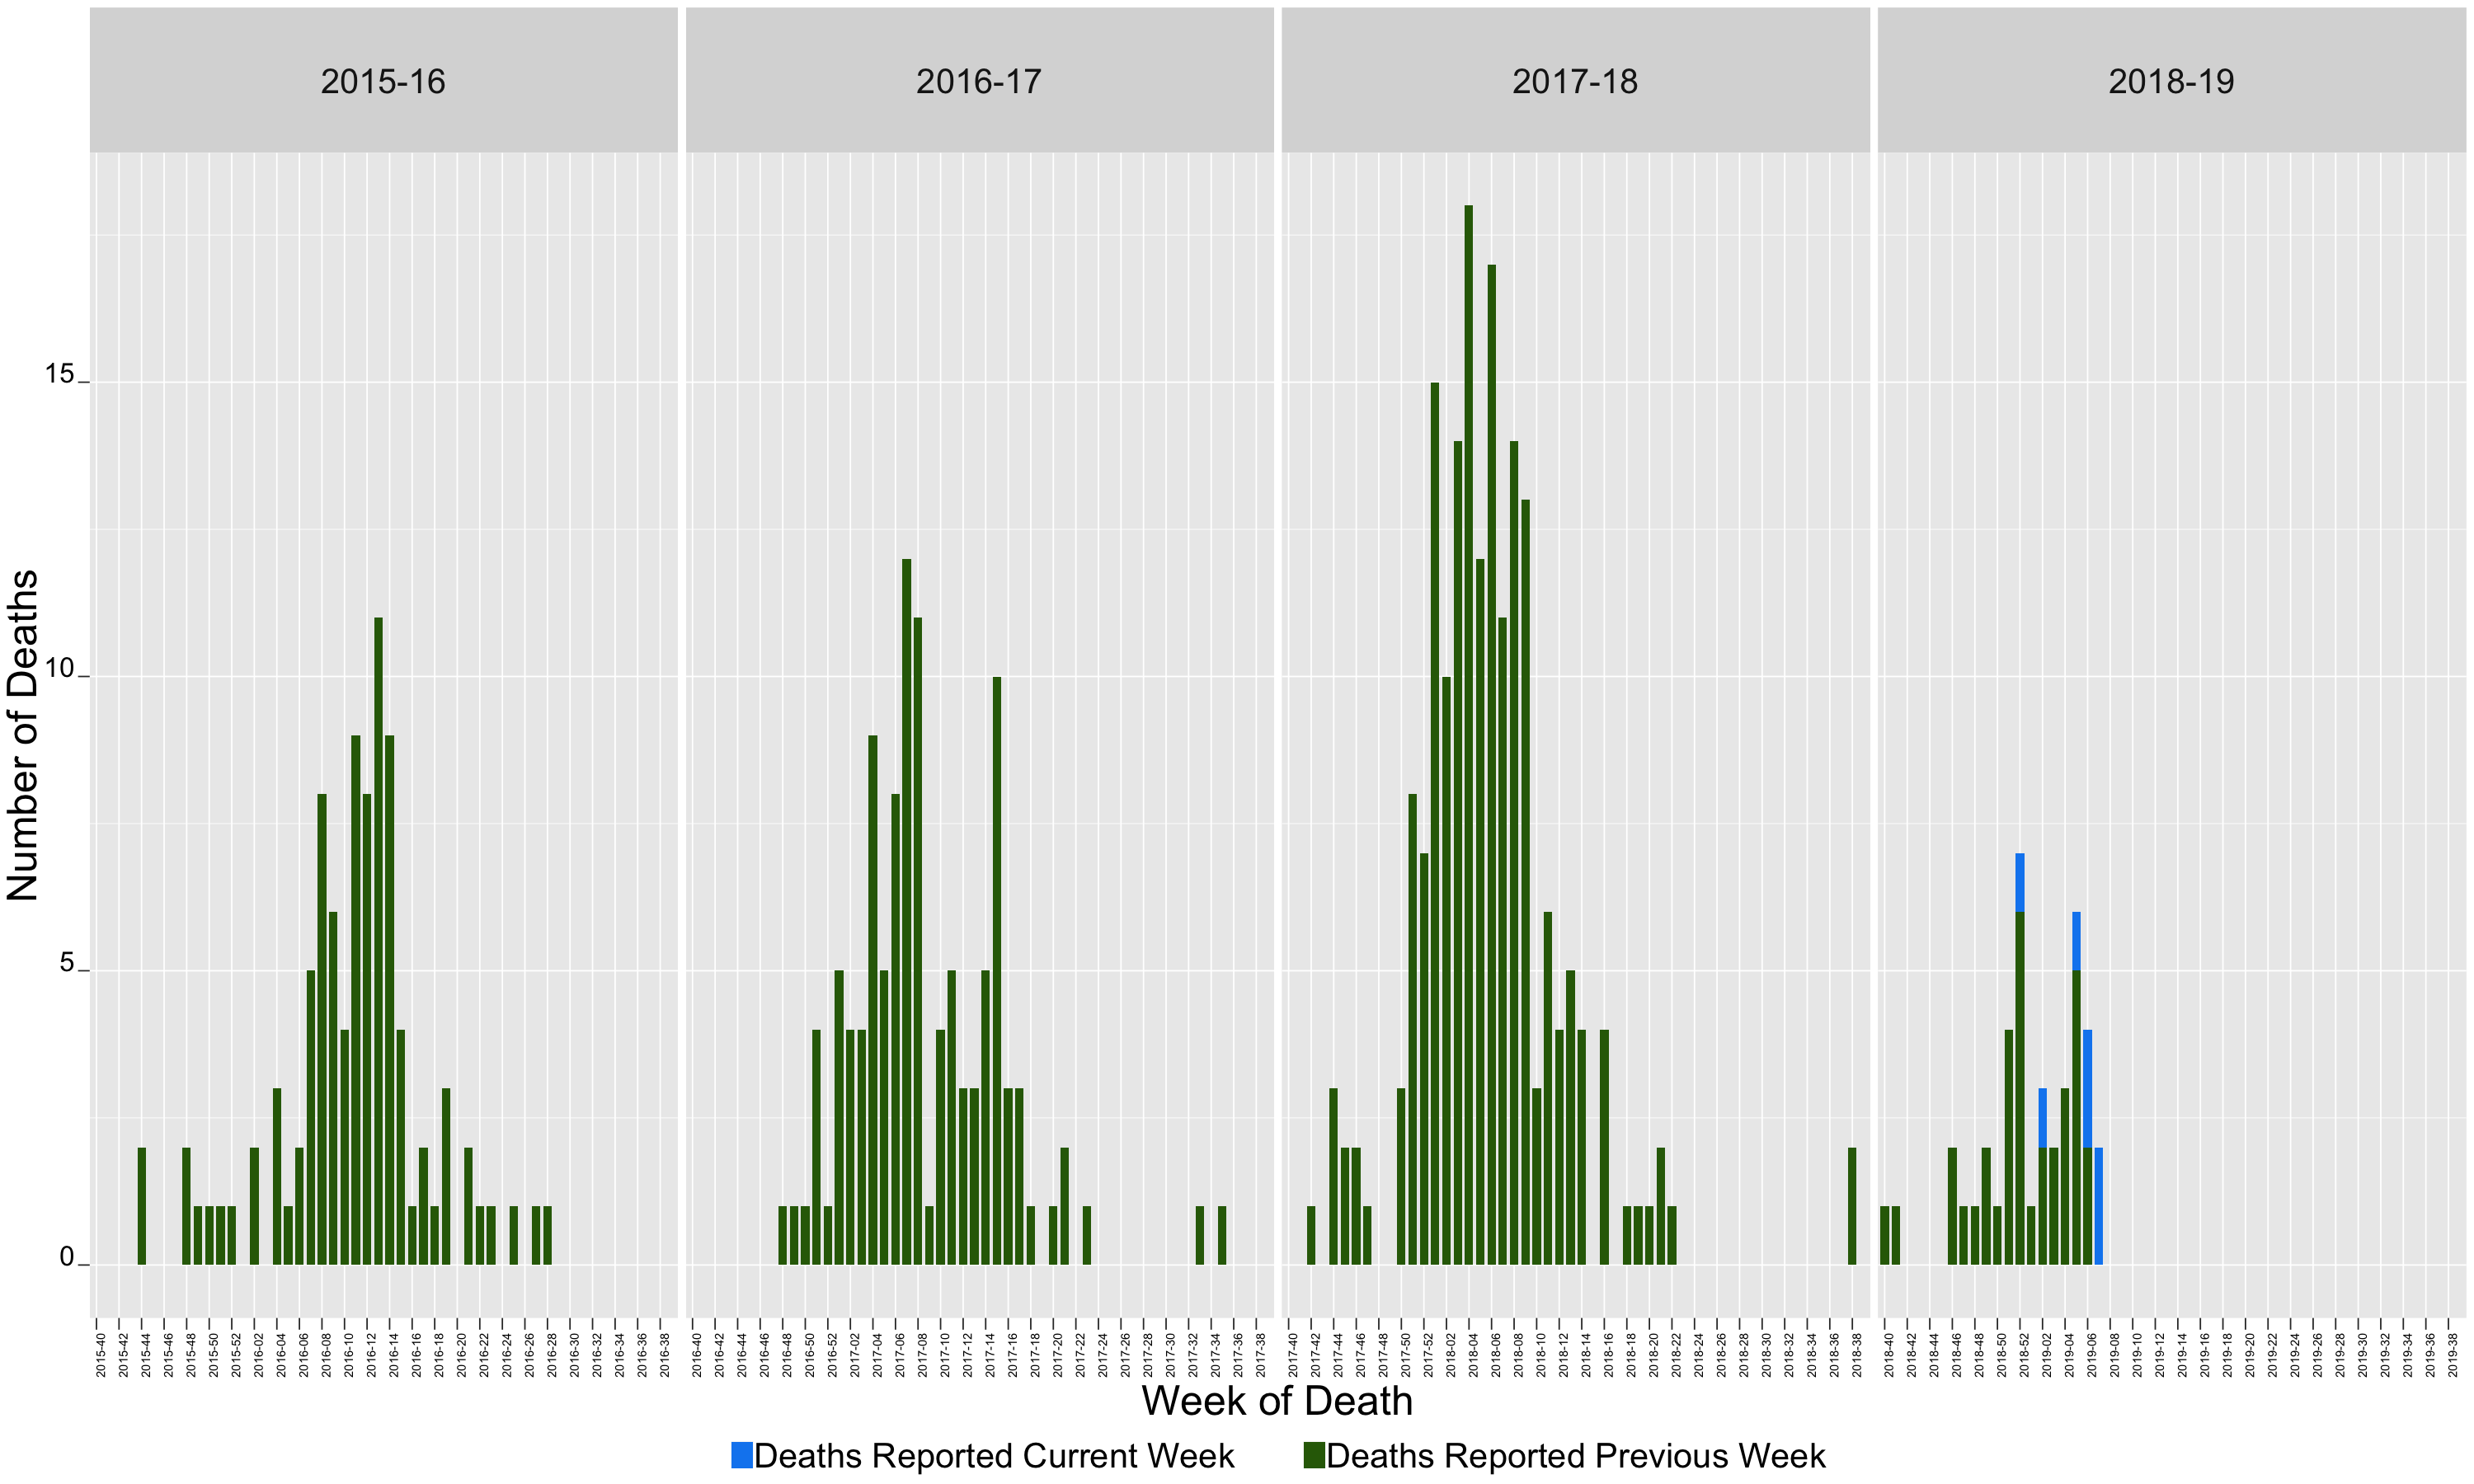

In [145]:
library(plyr)
library(ggplot2)
library(stringr)
library(repr)
library(dplyr)
options(repr.plot.width=25, repr.plot.height=15)
par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
weeklyDat <- read.csv("Weekly.csv", skip = 1)
library(reshape2)
weeklyDat <- melt(weeklyDat, id=c("SEASON","WEEK.NUMBER","NO..OF.DEATHS"))
weeklyDat <- plyr::rename(weeklyDat, c("SEASON"="season", "WEEK.NUMBER"="week", "NO..OF.DEATHS"="death", "variable"="fillDat", "value"="count"))

# weeklyDat$weekNew <- str_split_fixed(as.character(weeklyDat[,2]), "-", 2)[,2]
labWeek <- weeklyDat$week

sDeath <- weeklyDat %>% 
          group_by(season) %>% 
          summarise(sumDeath = sum(death))
deathVec <- sDeath$sumDeath
deathVectText <- paste("Number of deaths reported = ",deathVec, sep="")

# weeklyDat <- with(weeklyDat, weeklyDat[order(season, fillDat, week),])
p <- ggplot(data=weeklyDat, aes(x=labWeek, y=count, fill=rev(fillDat), width=.75)) + 
  geom_bar(stat="identity") + 
  labs(x="Week of Death",y="Number of Deaths")+
  facet_grid(~ season, scales="free_x")+
  scale_fill_manual(values = c("#0e88f0", "#2f6806"), labels = c("Deaths Reported Current Week       ", "Deaths Reported Previous Week"))+
  scale_x_discrete(breaks = unique(labWeek)[c(TRUE,FALSE)])

p + theme(legend.position="bottom", 
          legend.text=element_text(size=25),
          axis.text.x = element_text(angle = 90, hjust = 1, colour="black"),
          axis.text.y = element_text(size = 20, angle = 0, hjust = 1, vjust = 0, colour="black"),
          strip.text.x = element_text(size = 25,margin = margin(1.5,0,1.5,0, "cm")),
          axis.title=element_text(size=30,face="plain"),
          axis.ticks.length=unit(.30, "cm"),
          legend.title = element_blank()
         )



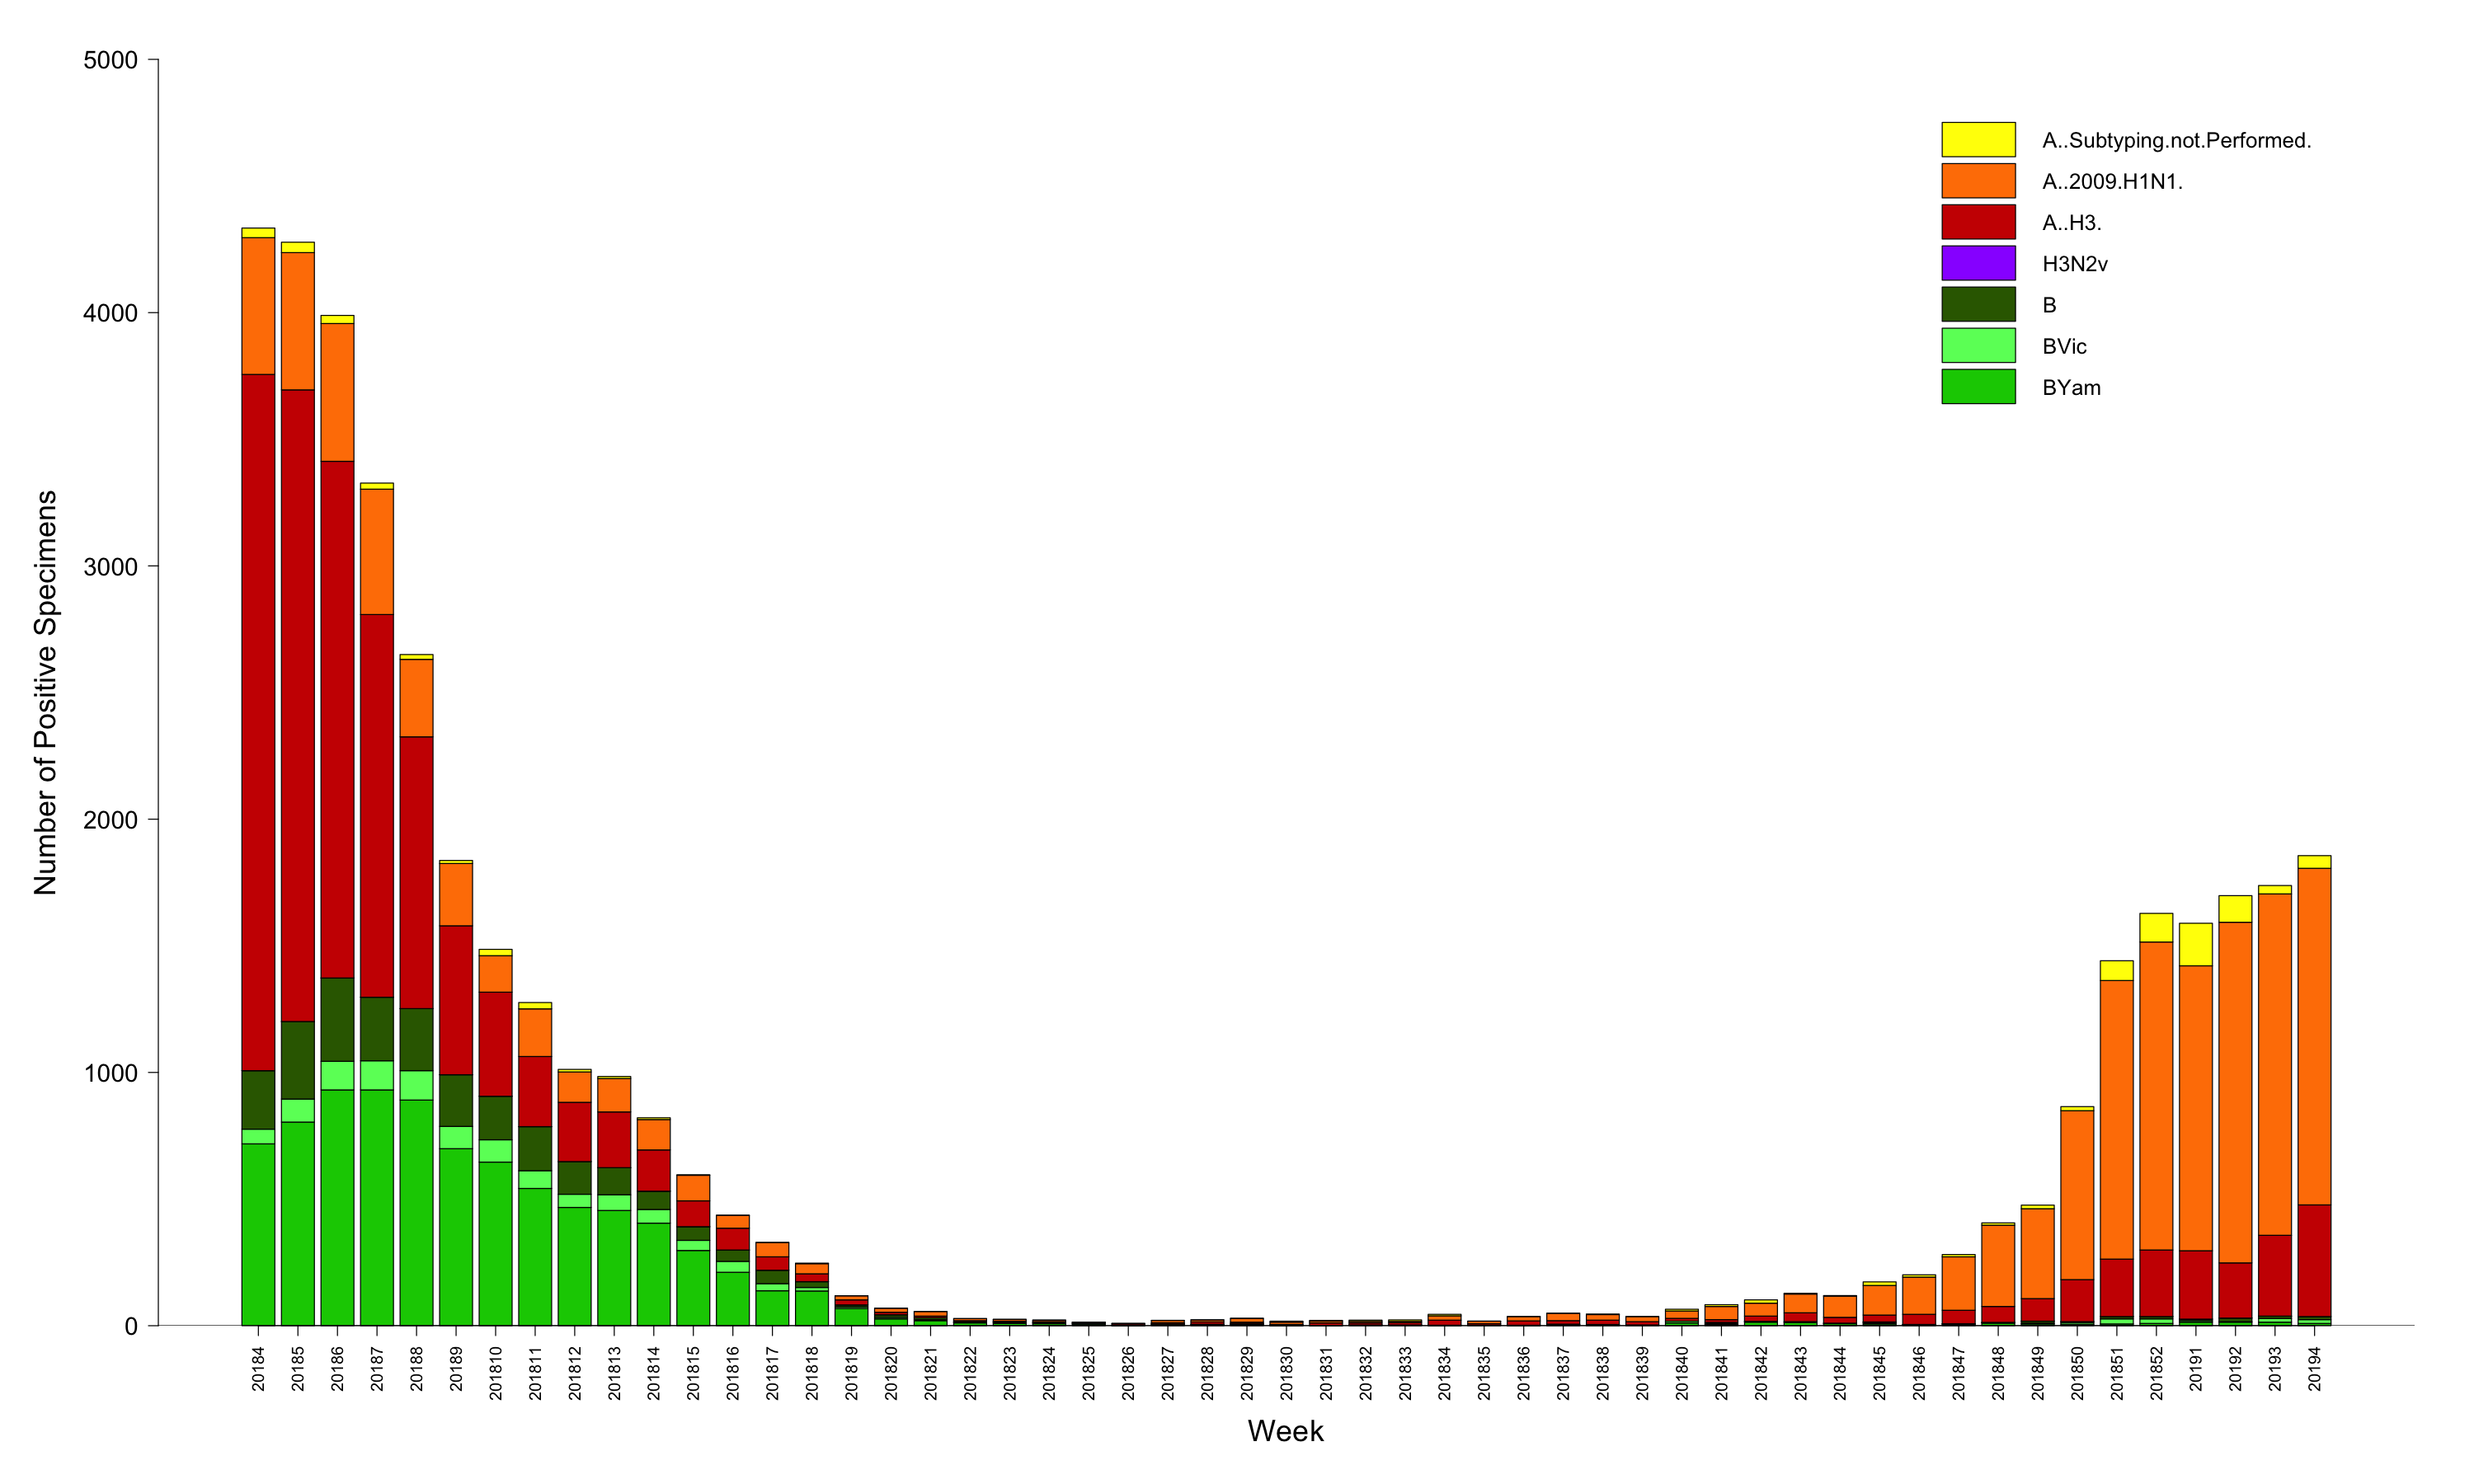

In [146]:
par(mar=c(8, 8, 3, 3))
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs_52.csv", skip = 1)
ptestsR <- ptests[17:69, c(1,2,3,4,5,11,10,9,12,7,6,8)]
year <- ptestsR[,3]
weeks <- ptestsR[,4]
weekLabel <- paste0(year, weeks)
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))),beside=F, names.arg=weekLabel, las=2,ylim=c(0,5000),col=colors,axis.lty="solid", cex.lab=2, cex.axis=1.5)
legend("topleft",inset=c(0.75,0.02),rownames(t(ptestsR[12:6])),fill=rev(colors), cex = 1.3, box.lty=0,x.intersp=0.3, y.intersp=0.6)
mtext("Week", side = 1, line = 5, cex = 1.8)
mtext("Number of Positive Specimens", side = 2, line = 5, cex = 1.8)
abline(h=0)

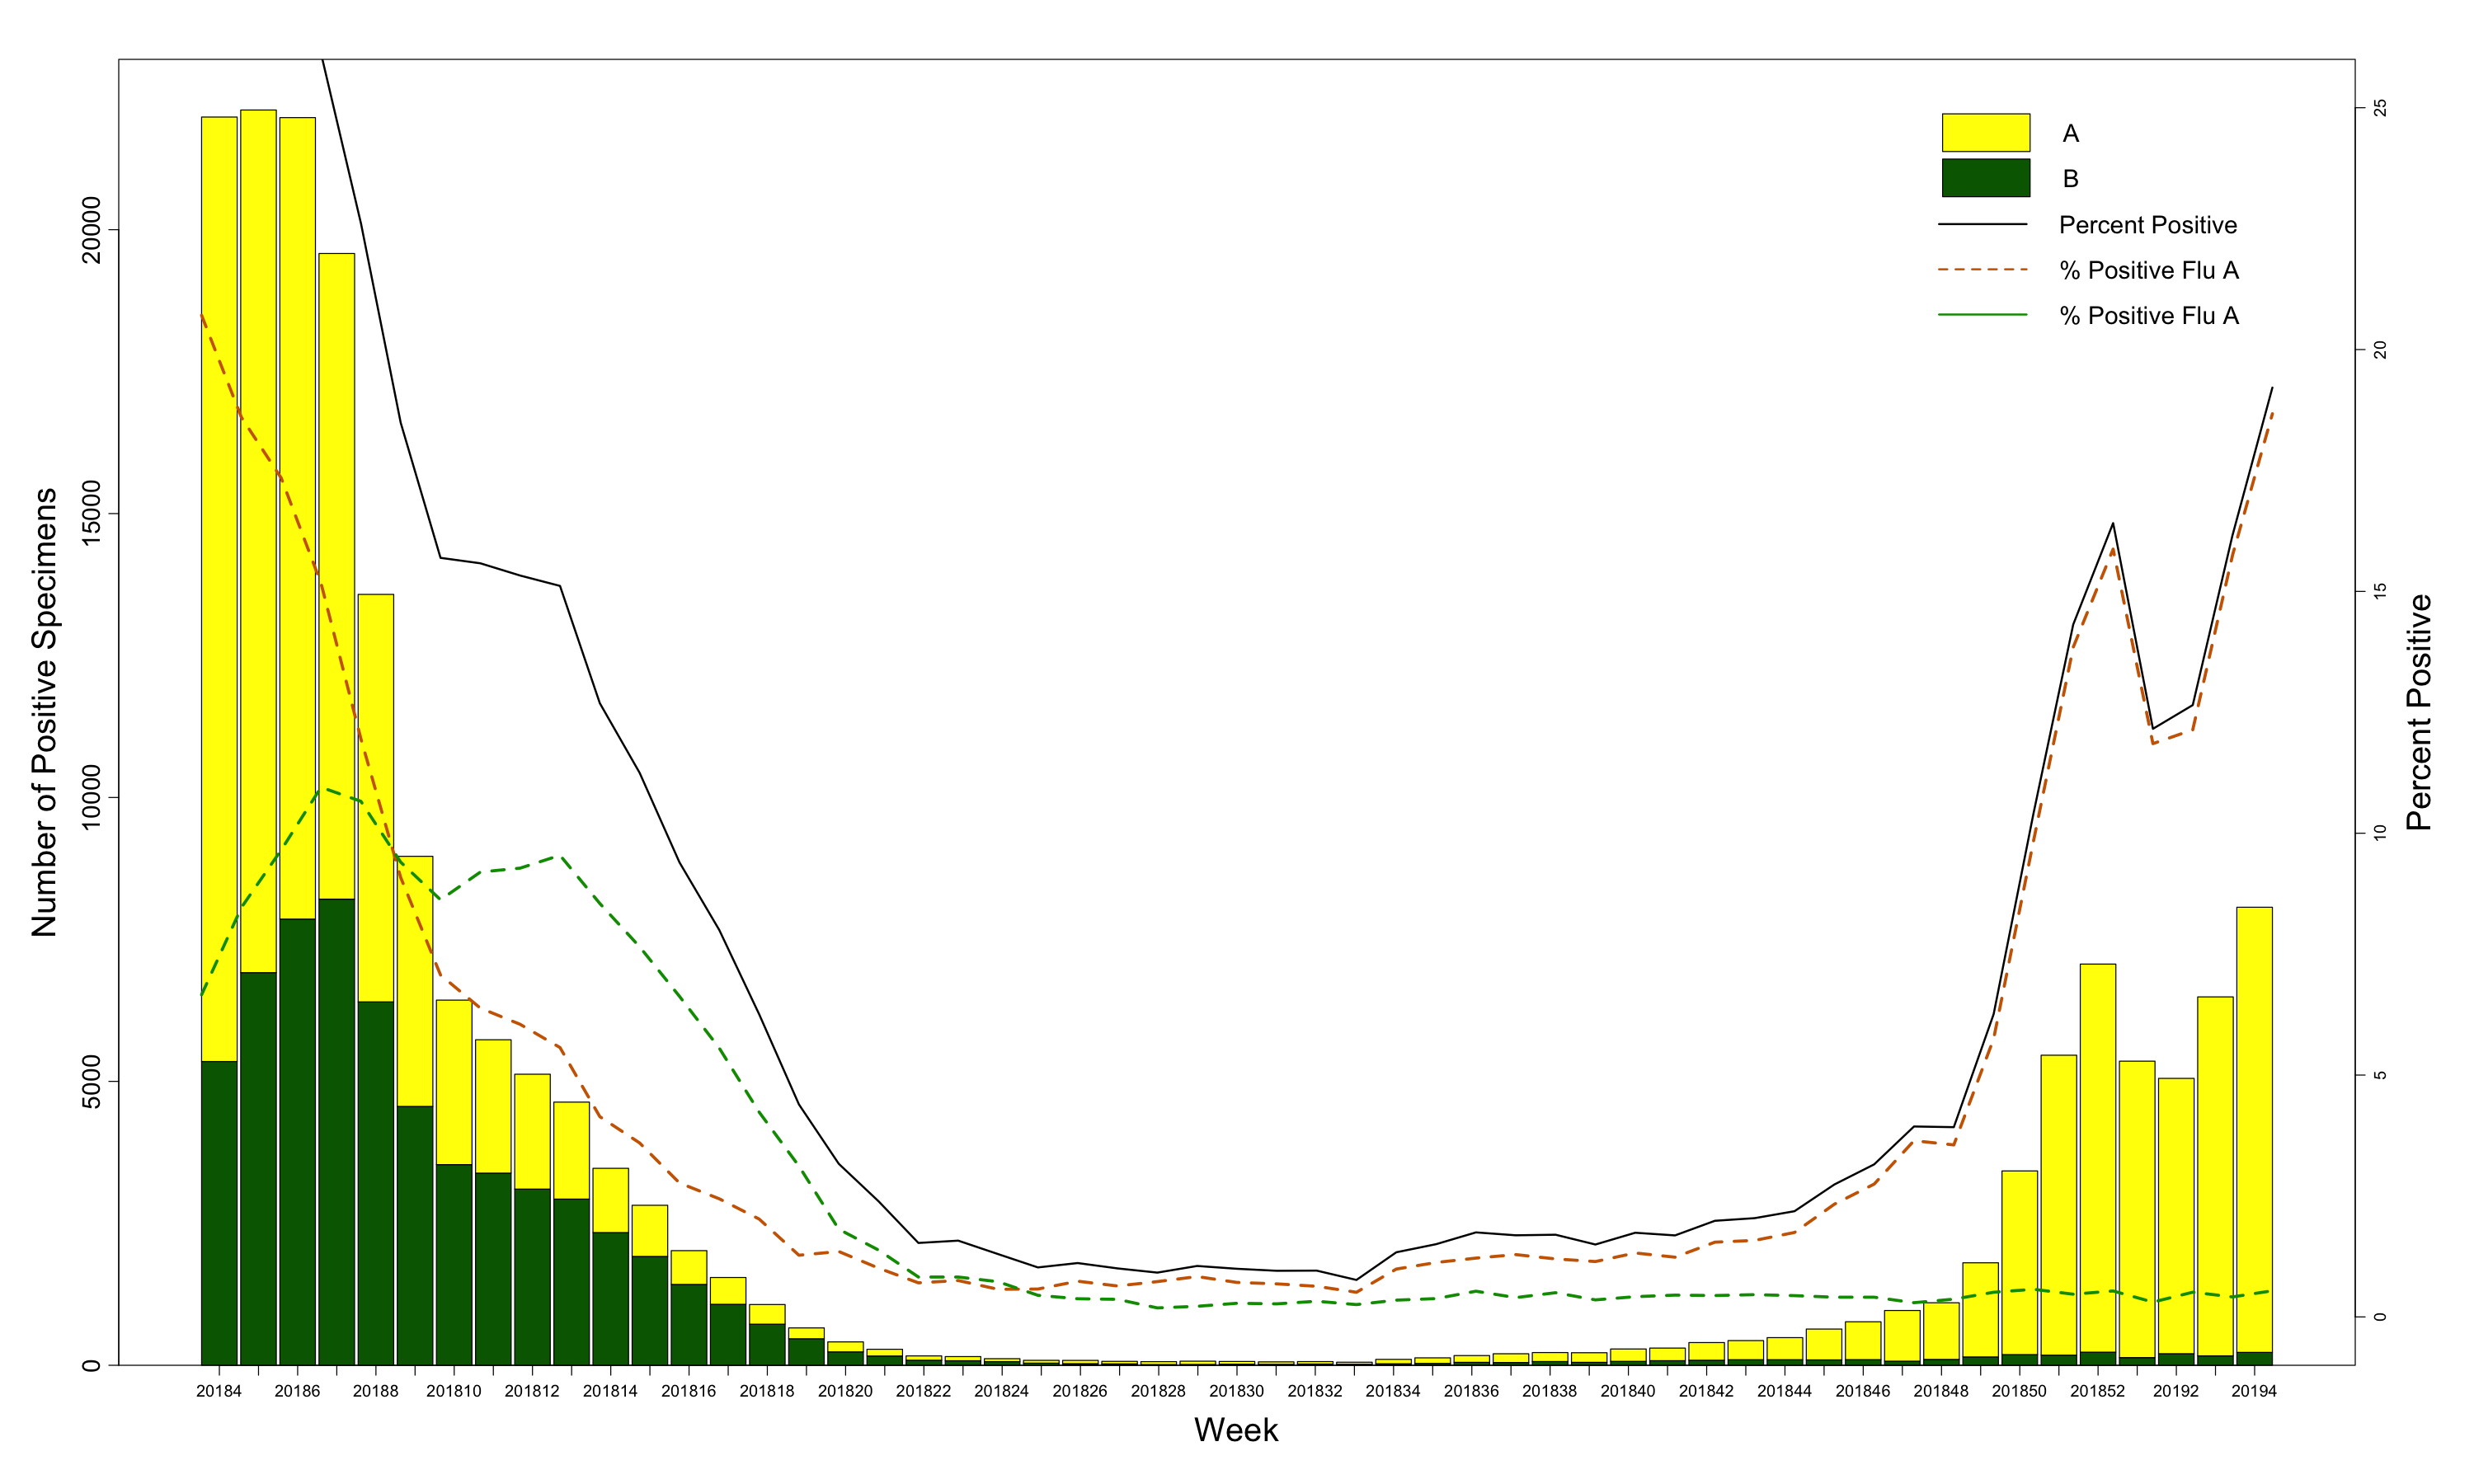

In [147]:

natSumm<-read.csv("WHO_NREVSS_Clinical_Labs_52.csv", skip = 1)
natSumm <- natSumm[17:69,]
colors <- c("darkgreen", "yellow")
year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu A")

par(mar=c(6, 6, 3, 6), mgp=c(2, 0.75, 0))
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), beside=F, ylim=c(0,23000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1, cex.lab=2, cex.axis=1.5)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,25), lwd=2, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2, lwd=3)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2, lwd=3)
axis(4)
mtext("Percent Positive", side = 4, line = 3, cex=2)
mtext("Week", side = 1, line = 3, cex=2)
mtext("Number of Positive Specimens", side = 2, line = 3, cex=2, cex.lab=5)
legend("topright",inset=c(0.07,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 1.5, box.lty=0, pt.cex = 0.5, x.intersp=0.3, y.intersp=0.6)
legend("topleft",inset=c(0.765,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=1:2, cex=1.5, box.lty=0, x.intersp=0.3, y.intersp=0.6, seg.len=0.8, lwd=2)



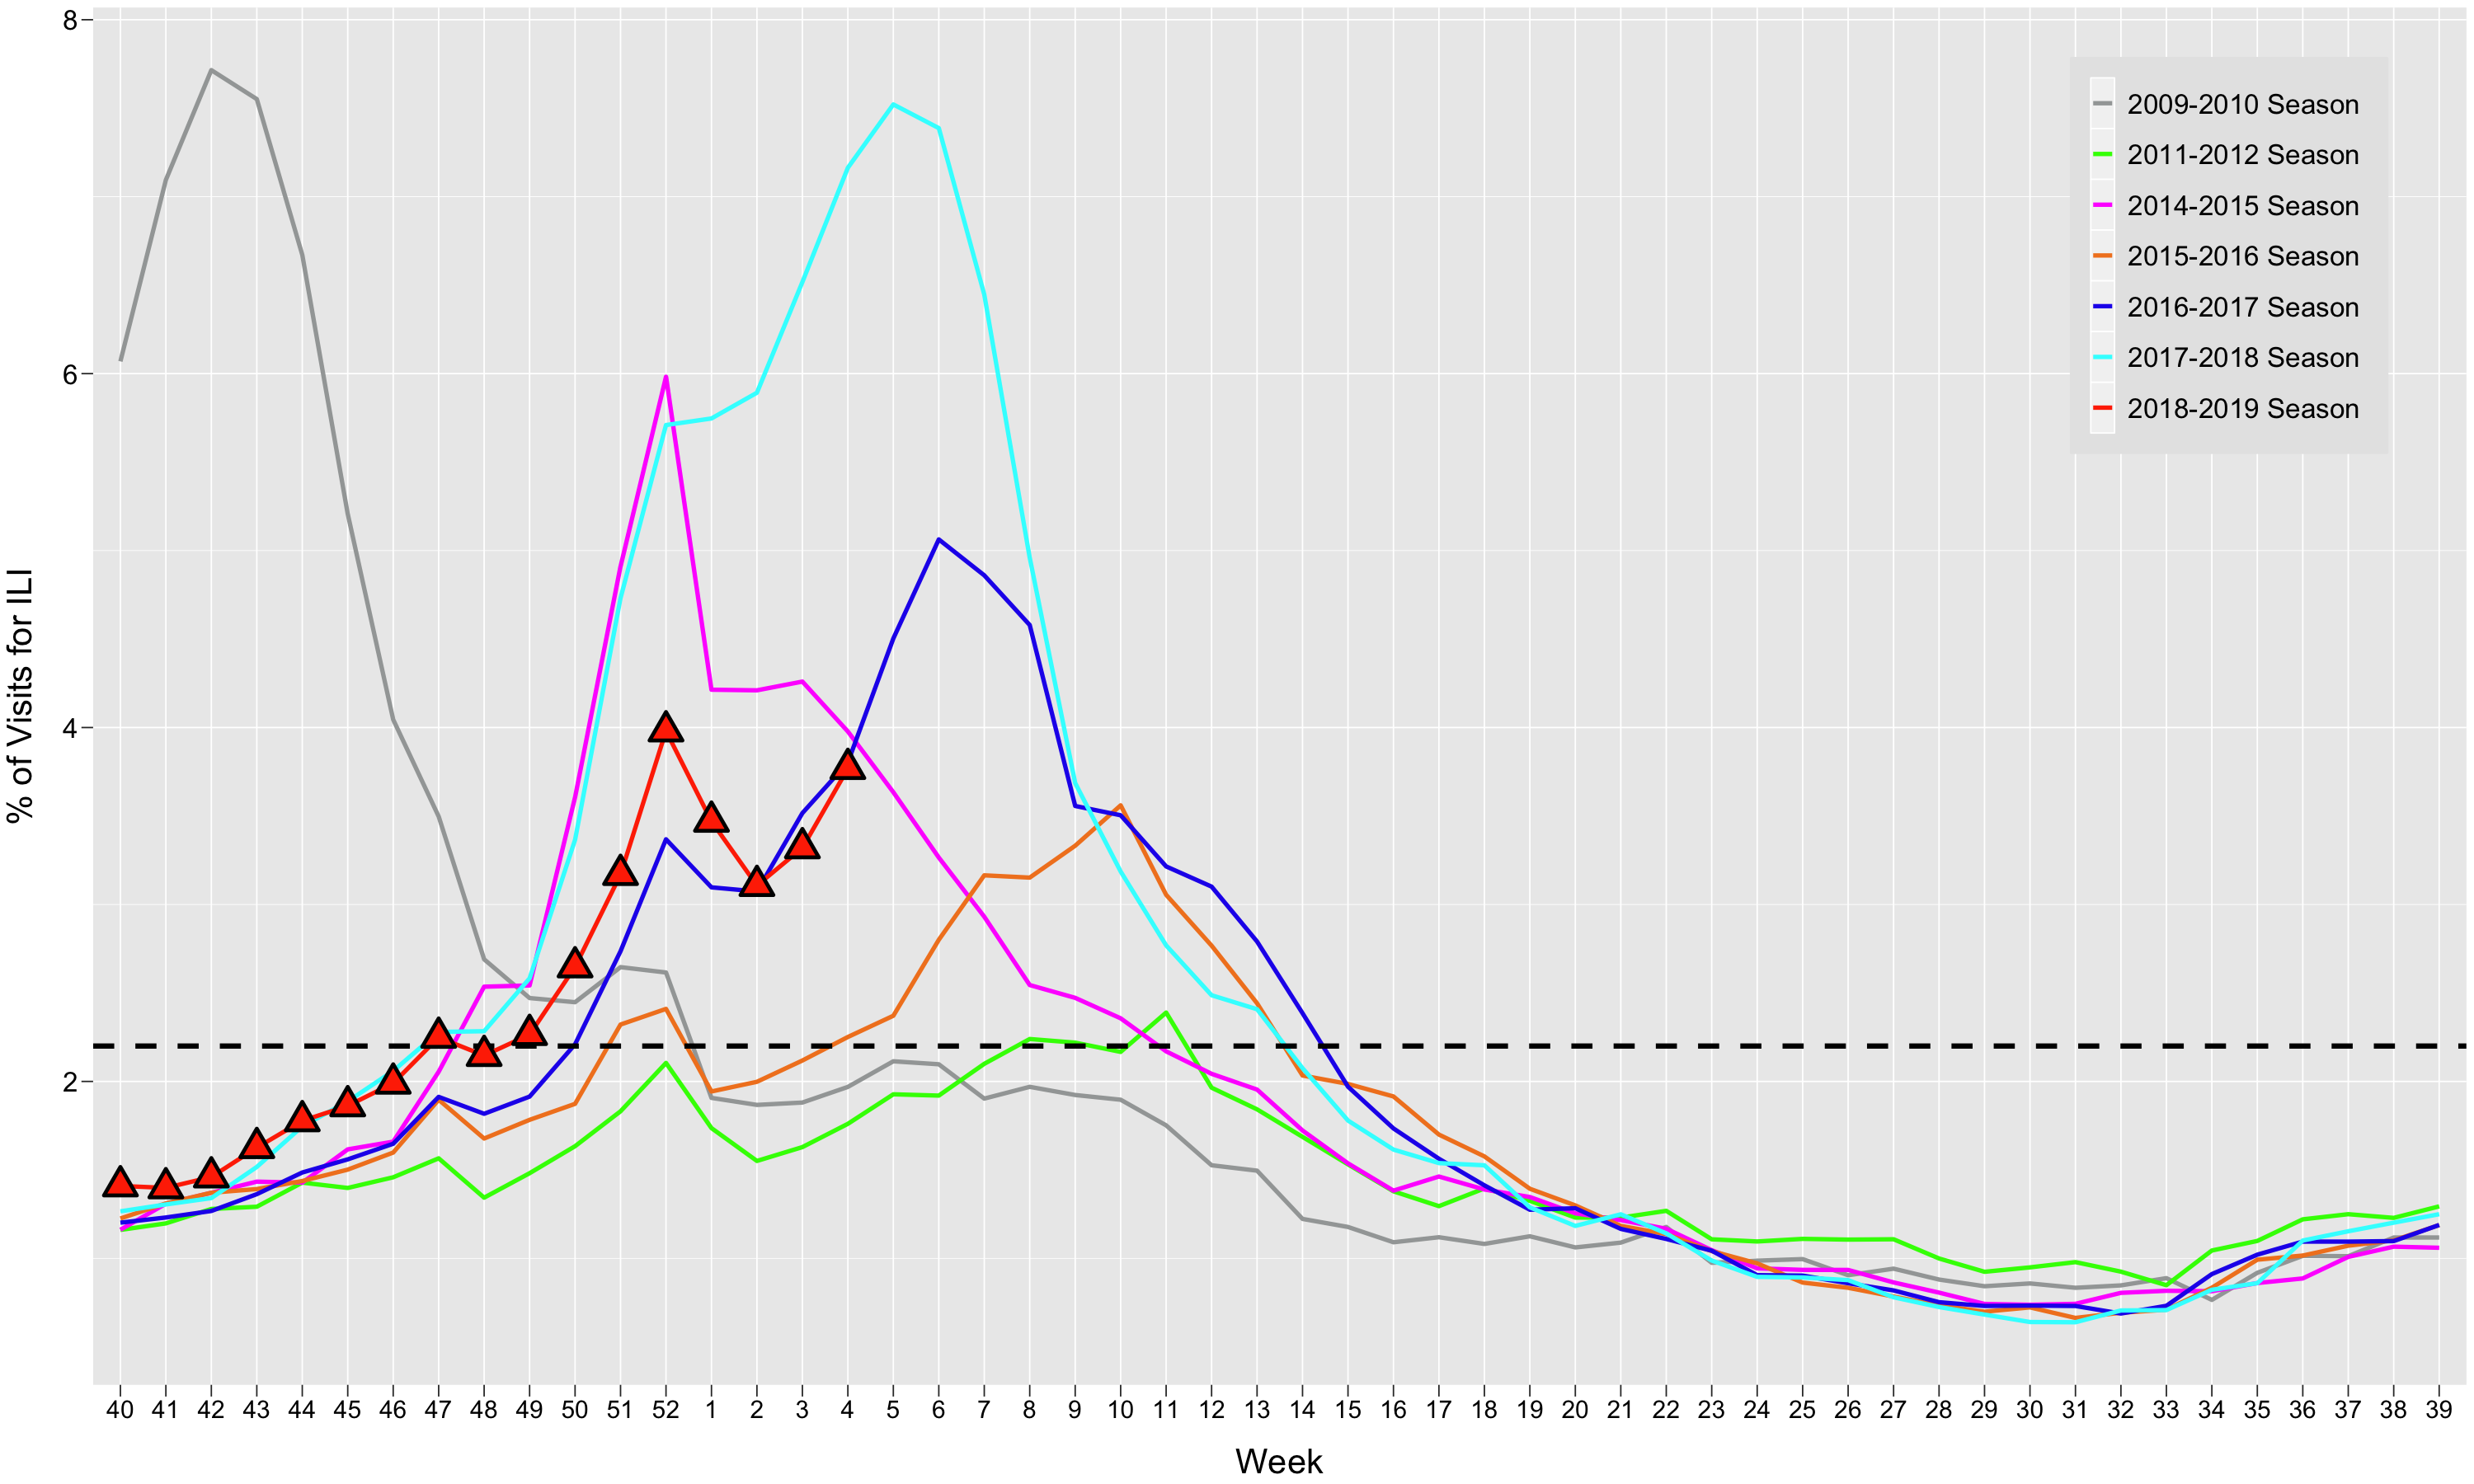

In [148]:
# install.packages("ggplot")
library(ggplot2)
library(dplyr)

iliDat <- read.csv("ILINet_yearly.csv", skip = 1)
iliDat <- tail(iliDat,-5)
iliDat <- head(iliDat, -3)

colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

xrange <- unique(iliDat$WEEK)

year_pairs <- data.frame("yearStart" = c(2009, 2011, 2014, 2015, 2016, 2017))


yearStartWeek <- seq(40,52)
yearEndWeek <- seq(1,39)


df <- data.frame(matrix(ncol = 16, nrow = 0))
x <- c("yearComb", colnames(iliDat))
colnames(df) <- x

plot <- ggplot()
for (i in 1:6) {
    currYear <- year_pairs[i,]
    pecrVectStart <- iliDat %>% 
                  filter(YEAR == currYear & WEEK %in% yearStartWeek)
    pecrVectEnd <- iliDat %>% 
                  filter(YEAR == currYear+1 & WEEK %in% yearEndWeek)
    
    pecrVect <- rbind(pecrVectStart,pecrVectEnd)
    
    dfYear <- data.frame("yearComb" = paste(paste(currYear, currYear+1, sep = "-"), "Season", sep = " "))
    dfYear <- cbind(dfYear, pecrVect)    
    df <- rbind(df,dfYear)
}



pecrVect18 <- iliDat %>% 
                filter(YEAR == 2018 & WEEK %in% yearStartWeek)
pecrVect19 <- iliDat %>% 
                filter(YEAR == 2019)
pecrVectEnd <- rbind(pecrVect18,pecrVect19)
dfEnd <- data.frame("yearComb" = paste(paste(2018, 2019, sep = "-"), "Season", sep = " "))
dfEnd <- cbind(dfEnd, pecrVectEnd)
df <- rbind(df,dfEnd)
xrangeEnd <- unique(dfEnd$WEEK)
dfEnd$WEEK <- factor(dfEnd$WEEK, levels=xrangeEnd)

df$WEEK <- factor(df$WEEK, levels=xrange)


p <- ggplot(data=df, aes(x=WEEK, y=X..WEIGHTED.ILI, group=yearComb, colour=yearComb)) + geom_line(size = 1.5)+
        geom_hline(yintercept=2.2, linetype="dashed", color = "black", size=1.8)+
        geom_point(data=dfEnd, aes(x=WEEK, y = X..WEIGHTED.ILI, colour=yearComb), colour = "black", shape=24, fill="#FF3300", size=7, stroke=2) + 
        labs(x="Week",y="% of Visits for ILI")+
        theme(legend.position = c(0.9, 0.82),
            legend.background = element_rect(color = "grey90", 
            fill = "grey90", size = 1),
            legend.text=element_text(size=20, margin = margin(b= 10,t =10,l=10, unit = "pt")),
            axis.text.x = element_text(size = 18, hjust = 0.5, colour="black", vjust=1),
            axis.text.y = element_text(size = 20, angle = 0, hjust = 0, vjust = 0.5, colour="black"),
            axis.title=element_text(size=25,face="plain"),
            axis.ticks.length=unit(.30, "cm"),
            legend.title = element_blank(),
            legend.margin=margin(t = 0.5, b=0.5, l=0.5, r=0.5, unit='cm'),
            axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
            axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0))
         )
        
p + scale_colour_manual(values = c("2009-2010 Season" = "#A3A6A6", "2011-2012 Season" = "#33FF00", "2014-2015 Season" = "#FF00FF", "2015-2016 Season" = "#F28323", "2016-2017 Season" = "#250EEC", "2017-2018 Season" = "#33FFFF", "2018-2019 Season" = "#FF3300"))





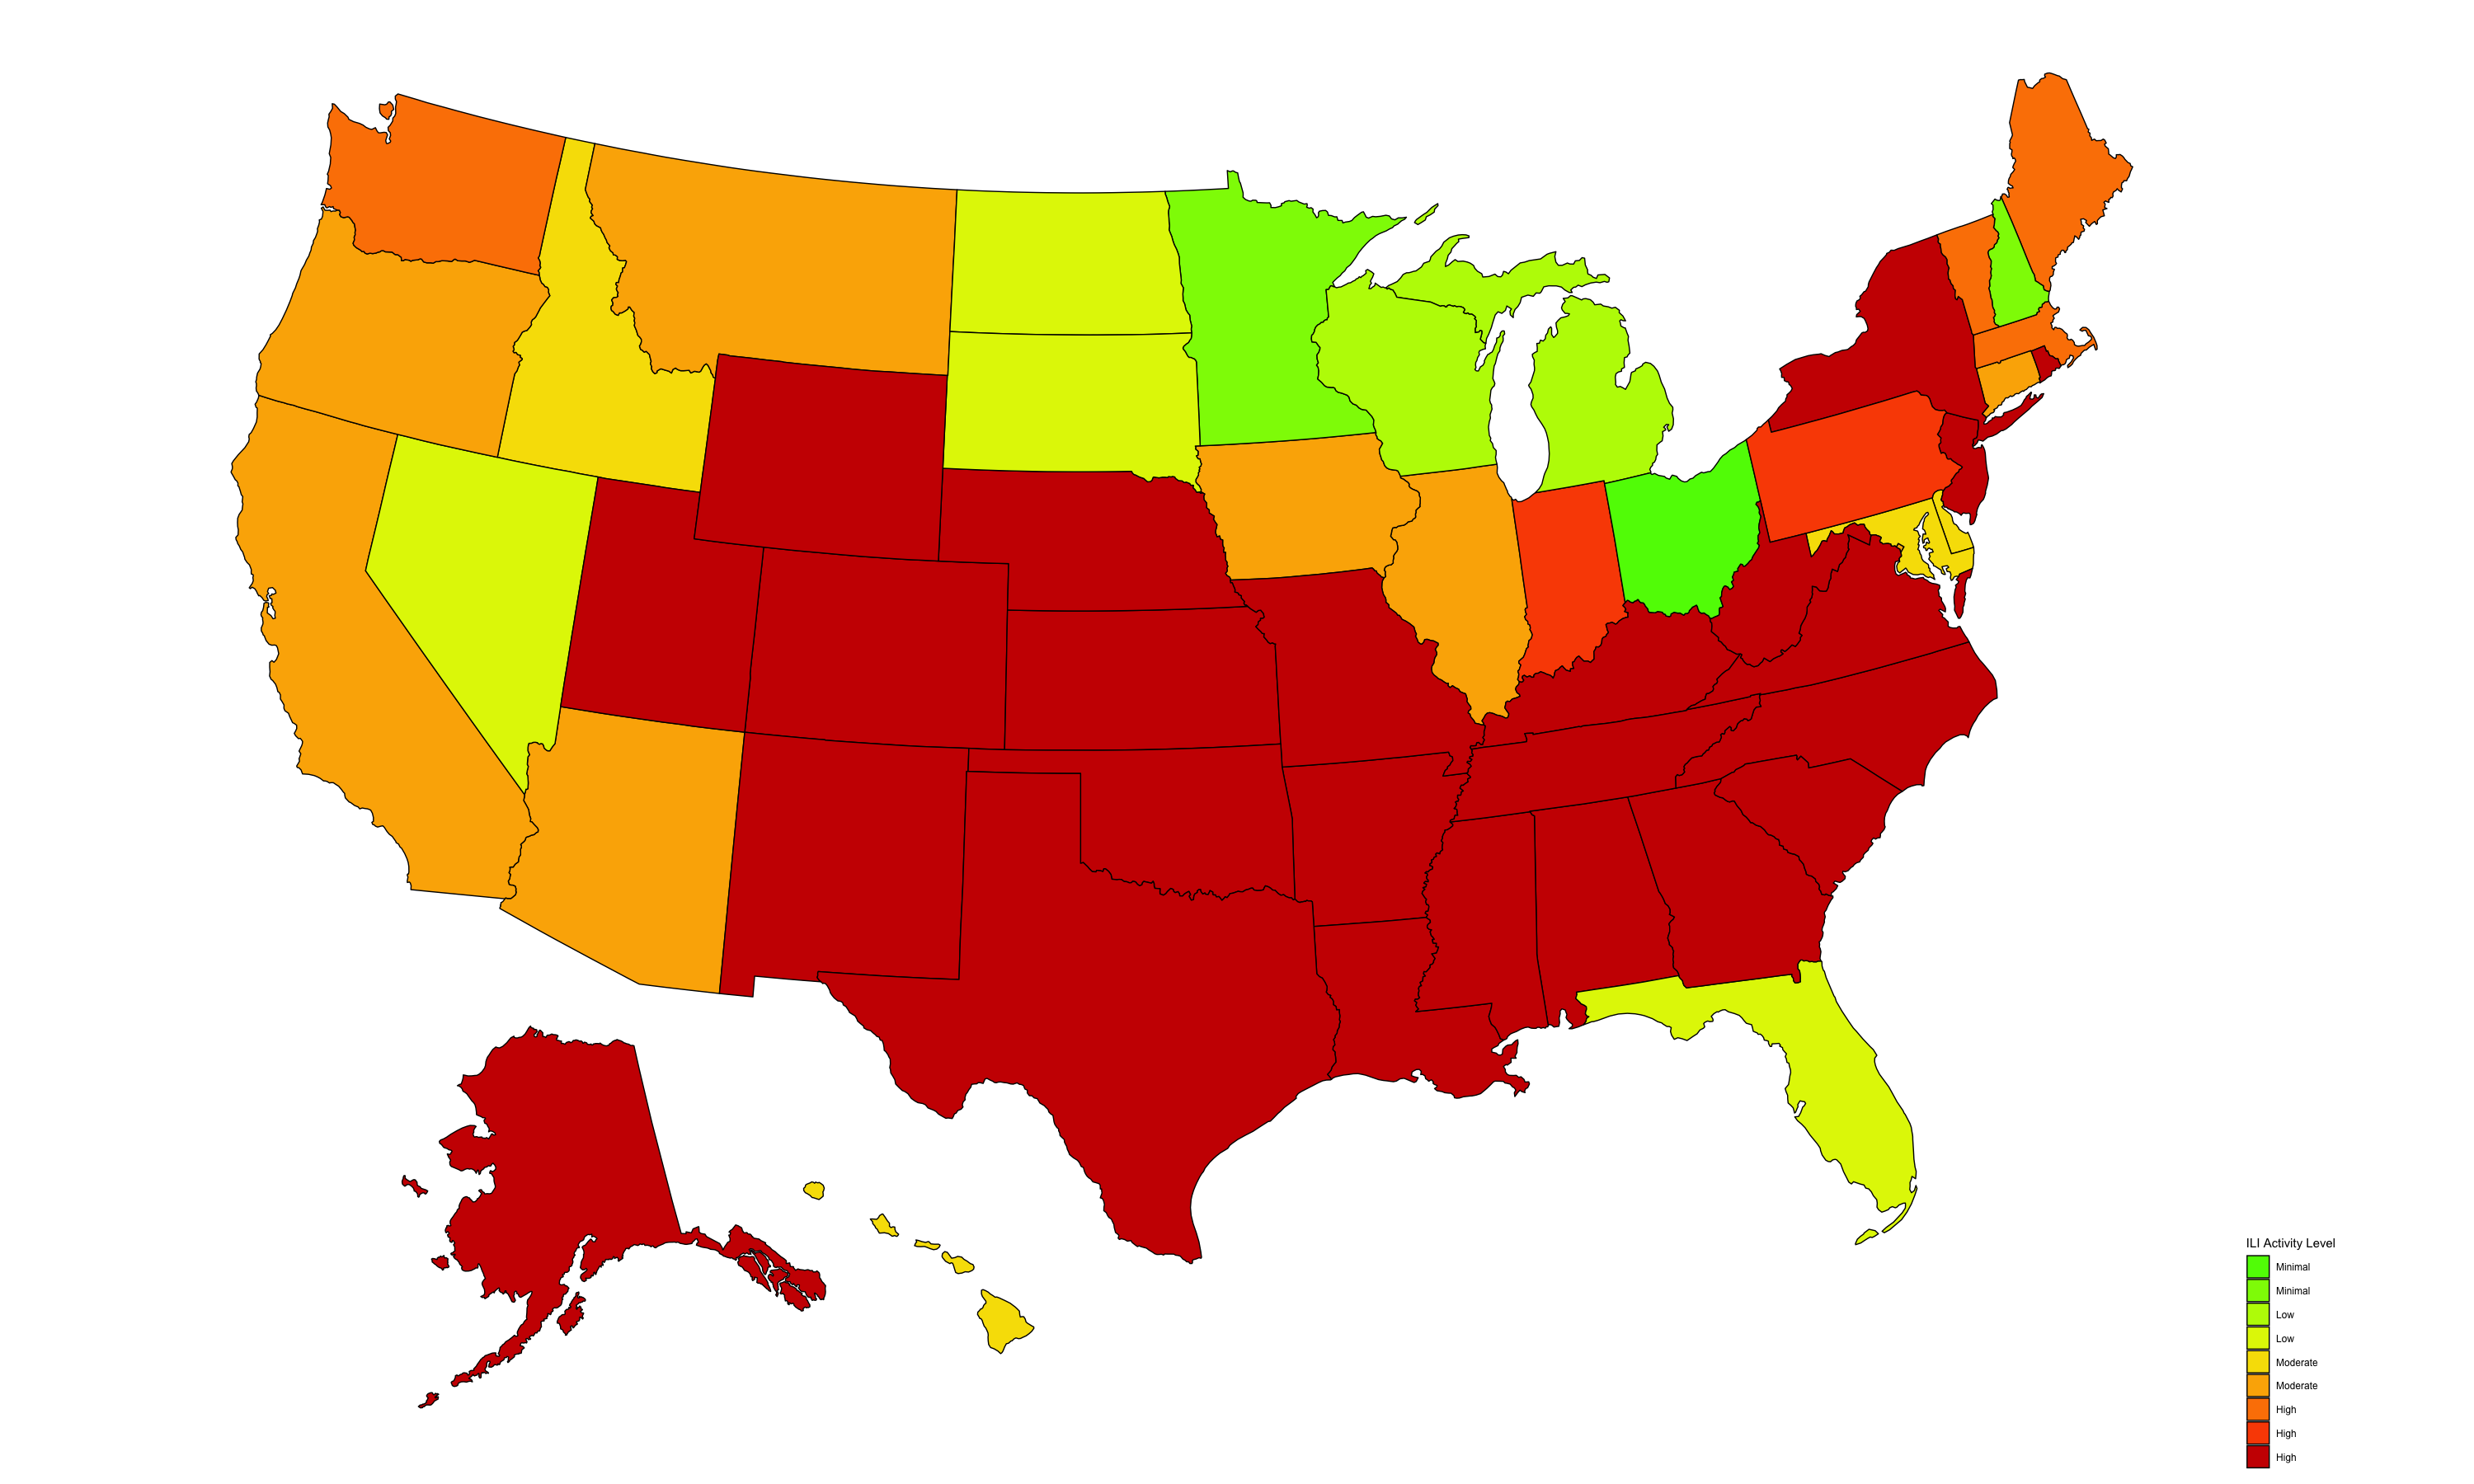

In [179]:
library(usmap)
library(ggplot2)


library(tidyr)

ili_activity_level = read.csv("StateDataforMap_2018-19week7.csv")
act <- ili_activity_level[c(1,4,5)]
names(act) <- c("full","level","label")
# nrow(act)
# act
# statepop

state_data <- merge(statepop,act, by="full")
# nrow(state_data)



state_data <-separate(data = state_data, col = level, into = c("leveltext", "levelvalue"), sep = " ")

# state_data$levelvalue <- as.character(state_data$levelvalue)
state_data$levelvalue[nchar(state_data$levelvalue) < 2 ] <- paste("0",state_data$levelvalue[nchar(state_data$levelvalue) < 2 ] , sep = "")
# state_data


color_pallete <- c("00" = "#FFFFFF", "01" = "#00C200", "02" = "#5BF700", "03" = "#8CF700", 
                   "04" = "#BAF700", "05" = "#E0F500", "06" = "#F7DF00", "07" = "#FCB100", 
                   "08" = "#FC8200",  "09" = "#FA4F00", "10" = "#CC0000")


label_list <- unique(state_data[c("levelvalue", "label")])

plot_usmap(data = state_data, values = "levelvalue") + 
scale_fill_manual(values = color_pallete, name= "ILI Activity Level",guide = 'legend', labels= label_list[order(label_list$levelvalue),][["label"]] ) +

theme(legend.position = "right")


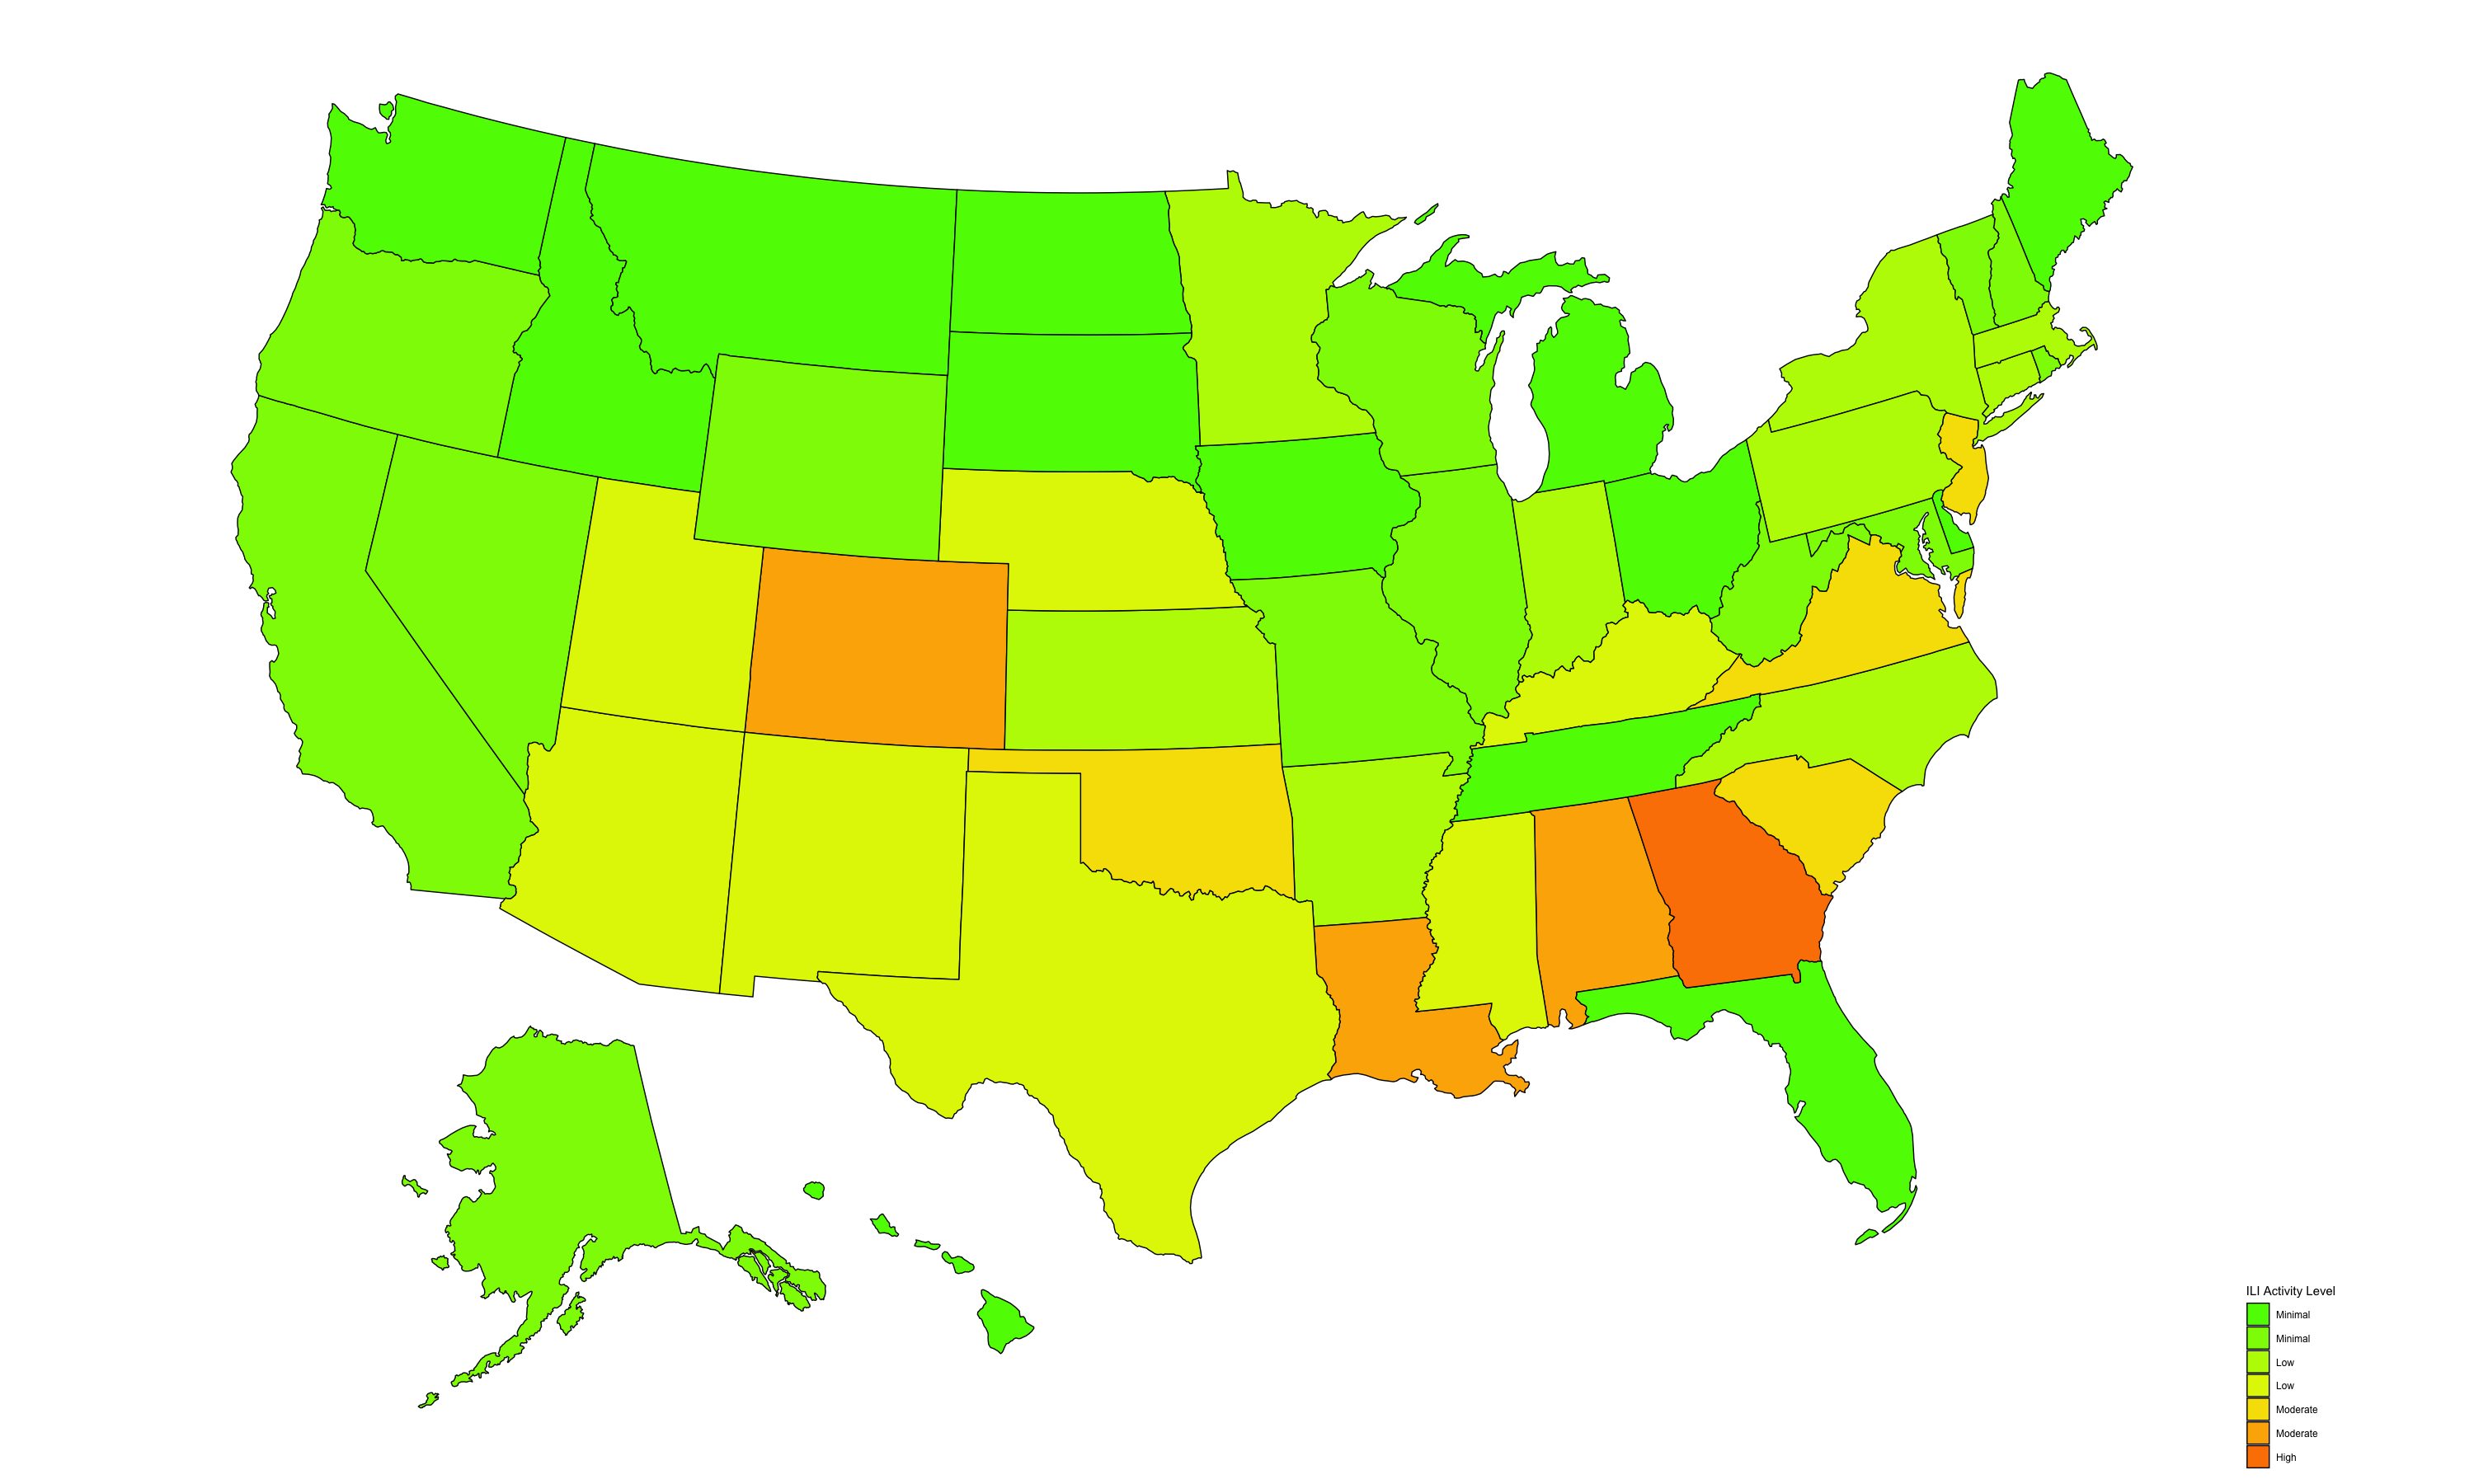

In [178]:
ili_activity_level = read.csv("StateDatabyWeekforMap_2018-19week40-4.csv")
act <- ili_activity_level[c(1,4,5,7)]

act <-separate(data = act, col = ACTIVITY.LEVEL, into = c("leveltext", "levelvalue"), sep = " ")

act$levelvalue <- as.numeric(act$levelvalue)
level_by_state <- ddply(act, .(STATENAME), summarize,  Level=ceiling(mean(levelvalue)))
names(level_by_state) <- c("full","level")

state_data <- merge(statepop,level_by_state, by="full")
state_data$level <- as.character(state_data$level)

# state_data

color_pallete <- c("0" = "#FFFFFF", "1" = "#00C200", "2" = "#5BF700", "3" = "#8CF700", 
                   "4" = "#BAF700", "5" = "#E0F500", "6" = "#F7DF00", "7" = "#FCB100", 
                   "8" = "#FC8200",  "9" = "#FA4F00", "10" = "#CC0000")



plot_usmap(data = state_data, values = "level") + 
scale_fill_manual(values = color_pallete, name= "ILI Activity Level",guide = 'legend', labels= label_list[order(label_list$levelvalue),][["label"]] ) +

theme(legend.position = "right")

